Типовой пайплайн:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from modules.data_analysis\
    .data_statistics import compute_descriptive_statistics
from modules.data_loading_to_dataFrame\
    .load_from_api import load_from_sklearn
from modules.data_analysis\
    .show_result_plot import plot_scatter_matrix_with_histograms
from modules.data_validation\
    .handle_missing_values import handle_missing_values
from modules.data_validation\
    .handle_outliers import handle_outliers
from settings import settings

In [6]:
data = load_from_sklearn("load_iris")
data.head()

INFO:modules.data_loading_to_dataFrame.load_from_api:Загрузка датасета из sklearn: load_iris
INFO:modules.data_loading_to_dataFrame.load_from_api:Загружено 150 строк


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
data = handle_missing_values(data, 'median')
data = handle_outliers(data, 0)
data = handle_outliers(data, 1)
data = handle_outliers(data, 2)
data = handle_outliers(data, 3)
data.head()

INFO:modules.data_validation.handle_missing_values:Applying numeric imputation strategy: median
INFO:modules.data_validation.handle_missing_values:No missing values found in numeric columns.
INFO:modules.data_validation.handle_missing_values:Missing value handling completed. Final DataFrame info logged.
INFO:modules.data_validation.handle_missing_values:Result shape: (150, 5), nulls total: 0
INFO:modules.data_validation.handle_outliers:IQR method: bounds = [3.1500, 8.3500]
INFO:modules.data_validation.handle_outliers:Detected 0 outliers in column 'sepal length (cm)' using method 'iqr'.
INFO:modules.data_validation.handle_outliers:No outliers to handle.
INFO:modules.data_validation.handle_outliers:IQR method: bounds = [2.0500, 4.0500]
INFO:modules.data_validation.handle_outliers:Detected 4 outliers in column 'sepal width (cm)' using method 'iqr'.
INFO:modules.data_validation.handle_outliers:Removed 4 rows containing outliers.
INFO:modules.data_validation.handle_outliers:IQR method: boun

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


INFO:modules.data_analysis.show_result_plot:Using 'target' for coloring points.
INFO:modules.data_analysis.show_result_plot:Plotting scatter matrix for columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


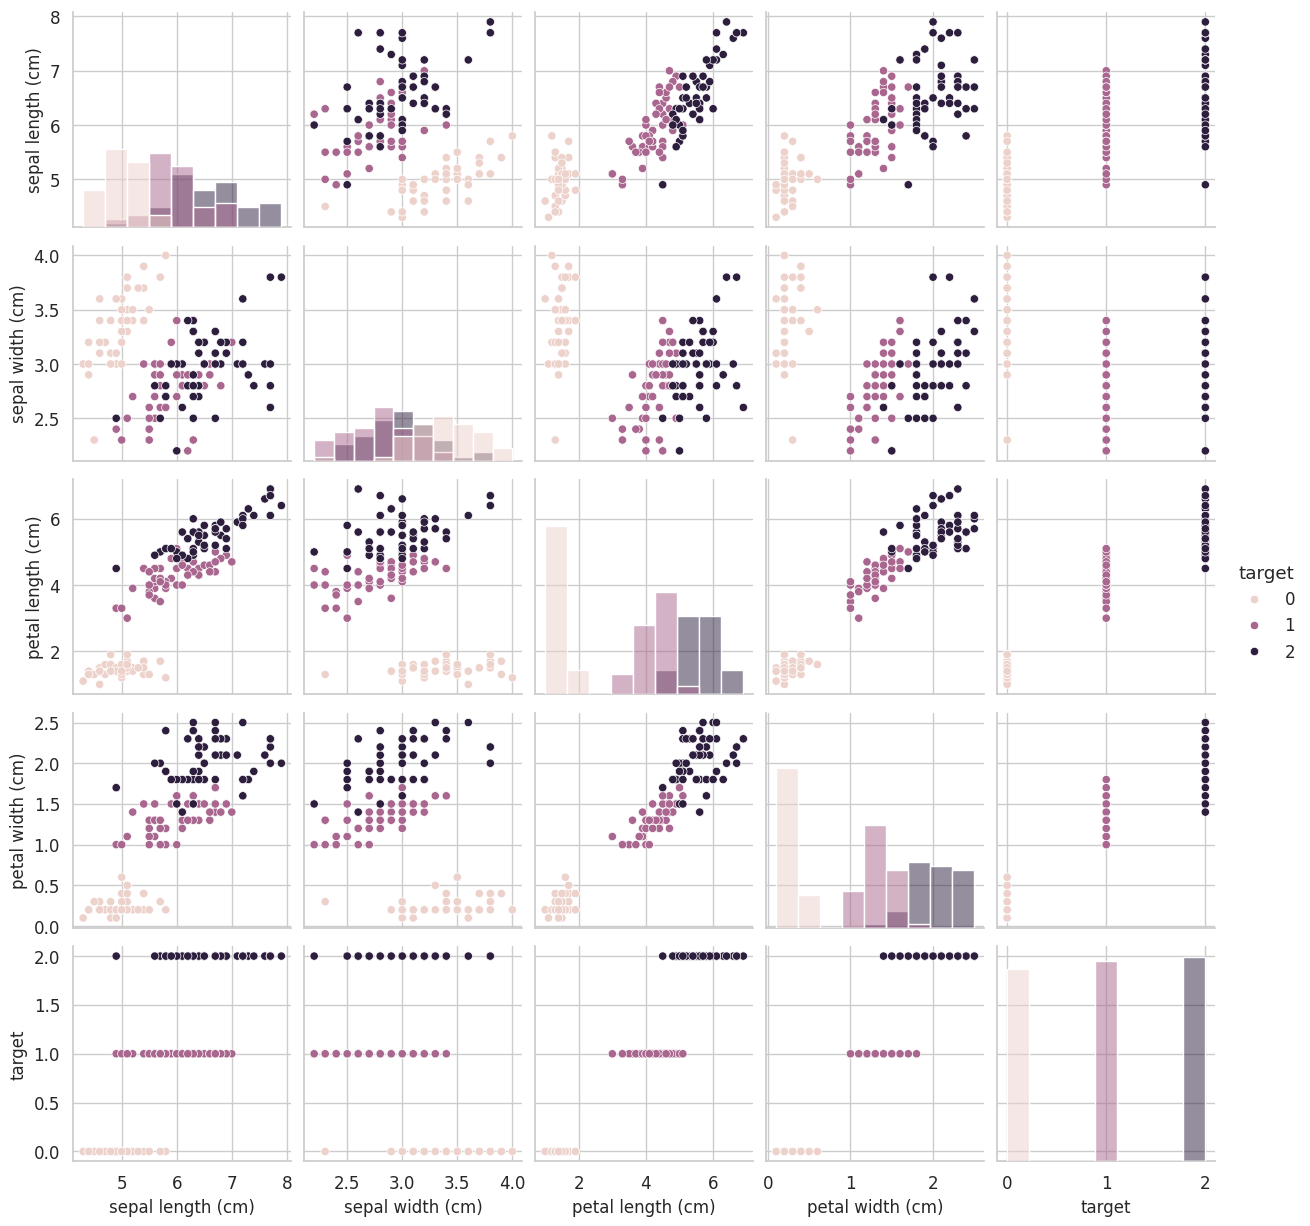

In [8]:
plot_scatter_matrix_with_histograms(data, hue_column='target')

In [9]:
X, y = data.drop('target', axis=1), data['target']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [16]:
from modules.data_analysis.gboost_models import xgb_run_classification_grid_search
from modules.data_analysis.show_result_plot import plot_grid_search_results
XGB_CLASSIFIER_PARAMS = {
    "n_estimators": [10, 20, 30, 40 ],
    "max_depth": [2, 4, 6, 8],
    "learning_rate": [0.01, 0.1, 0.2, 0.005],
    "subsample": [0.8, 1.0],
    "random_state": [42]
}
results = xgb_run_classification_grid_search(
    X_train,
    y_train,
    X_test,
    y_test,
    param_grid=XGB_CLASSIFIER_PARAMS,
    scoring='accuracy'
)
plot_grid_search_results(
    results['plot_data'], 
    model_name='First_model',
    output_dir='./')
print(results['best_params'])
print(results['test_metrics'])


INFO:modules.data_analysis.gboost_models:Starting GridSearchCV for XGBClassifier
INFO:modules.data_analysis.gboost_models:Parameter grid: {'n_estimators': [10, 20, 30, 40], 'max_depth': [2, 4, 6, 8], 'learning_rate': [0.01, 0.1, 0.2, 0.005], 'subsample': [0.8, 1.0], 'random_state': [42]}
INFO:modules.data_analysis.gboost_models:Fitting GridSearchCV...
INFO:modules.data_analysis.gboost_models:GridSearchCV completed. Best score: 0.9221
INFO:modules.data_analysis.show_result_plot:GridSearch plot saved to ./grid_search_First_model.png


{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 10, 'random_state': 42, 'subsample': 1.0}
{'accuracy': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}
